<a href="https://colab.research.google.com/github/abelnane/abelnane/blob/main/Spotify_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Install unicode

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 5.9 MB/s eta 0:00:00


#Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
%matplotlib inline






#Uploading dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Spotify_Analisis/artists.csv')

In [ ]:
df


,Artist,Streams,Daily,As lead,Solo,As feature
0,Drake,"85,041.3",50.775,"57,252.6","32,681.6","27,788.7"
1,Bad Bunny,"67,533.0",44.820,"40,969.6","23,073.0","26,563.4"
2,Taylor Swift,"57,859.0",85.793,"55,566.7","50,425.7","2,292.4"
3,The Weeknd,"53,665.2",44.437,"42,673.3","31,164.2","10,991.9"
4,Ed Sheeran,"47,907.7",17.506,"42,767.9","33,917.0","5,139.8"
...,...,...,...,...,...,...
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1
2998,Kings of Convenience,728.6,0.252,728.6,618.9,NaN


#Business Analytics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      3000 non-null   object 
 1   Streams     3000 non-null   object 
 2   Daily       2994 non-null   float64
 3   As lead     2984 non-null   object 
 4   Solo        2931 non-null   object 
 5   As feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 140.8+ KB


####Data treatment on columns "As lead" and "As feature"

In [ ]:
df.rename(columns={'As lead': 'As_lead', 'As feature': 'As_feature'}, inplace=True)

#### Nulls data analysis

In [ ]:
df.isna().sum().sort_values(ascending = False)

As_feature    338
Solo           69
As_lead        16
Daily           6
Artist          0
Streams         0
dtype: int64

####Delete NA on 'As_feature'

In [ ]:
df = df.dropna(subset=['As_feature'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2662 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      2662 non-null   object 
 1   Streams     2662 non-null   object 
 2   Daily       2659 non-null   float64
 3   As_lead     2646 non-null   object 
 4   Solo        2598 non-null   object 
 5   As_feature  2662 non-null   object 
dtypes: float64(1), object(5)
memory usage: 145.6+ KB


####Replace commas from 'As_feature', 'Solo' and 'Streams' and convert from object into float.

In [ ]:
df['Solo'] = pd.to_numeric(df['Solo'], errors='coerce')
df['As_feature'] = pd.to_numeric(df['As_feature'], errors='coerce')

<ipython-input-10-a92242df3235>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Solo'] = pd.to_numeric(df['Solo'], errors='coerce')
<ipython-input-10-a92242df3235>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['As_feature'] = pd.to_numeric(df['As_feature'], errors='coerce')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2662 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Artist      2662 non-null   object 
 1   Streams     2662 non-null   object 
 2   Daily       2659 non-null   float64
 3   As_lead     2646 non-null   object 
 4   Solo        1635 non-null   float64
 5   As_feature  2107 non-null   float64
dtypes: float64(3), object(3)
memory usage: 145.6+ KB


####Replace ',' for '.' in column "Streams"


In [ ]:
df['Streams'] = df['Streams'].apply(str).str.replace(',', '').astype(float)
df['As_lead'] = df['As_lead'].apply(str).str.replace(',', '').astype(float)
df['As_feature'] = df['As_feature'].apply(str).str.replace(',', '').astype(float)
df['Solo'] = df['Solo'].apply(str).str.replace(',', '').astype(float)

<ipython-input-12-9b15385c3bec>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Streams'] = df['Streams'].apply(str).str.replace(',', '').astype(float)
<ipython-input-12-9b15385c3bec>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['As_lead'] = df['As_lead'].apply(str).str.replace(',', '').astype(float)
<ipython-input-12-9b15385c3bec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [ ]:
df

,Artist,Streams,Daily,As_lead,Solo,As_feature
0,Drake,85041.3,50.775,57252.6,NaN,NaN
1,Bad Bunny,67533.0,44.820,40969.6,NaN,NaN
2,Taylor Swift,57859.0,85.793,55566.7,NaN,NaN
3,The Weeknd,53665.2,44.437,42673.3,NaN,NaN
4,Ed Sheeran,47907.7,17.506,42767.9,NaN,NaN
...,...,...,...,...,...,...
2994,"Grover Washington, Jr.",729.9,0.466,727.5,208.1,2.4
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1


In [ ]:
df.count()

Artist        2662
Streams       2662
Daily         2659
As_lead       2646
Solo          1635
As_feature    2107
dtype: int64

In [ ]:
df.shape


(2662, 6)

In [ ]:
df.head(16)

,Artist,Streams,Daily,As_lead,Solo,As_feature
0,Drake,85041.3,50.775,57252.6,NaN,NaN
1,Bad Bunny,67533.0,44.820,40969.6,NaN,NaN
2,Taylor Swift,57859.0,85.793,55566.7,NaN,NaN
3,The Weeknd,53665.2,44.437,42673.3,NaN,NaN
4,Ed Sheeran,47907.7,17.506,42767.9,NaN,NaN
5,Justin Bieber,47525.7,18.868,27988.0,NaN,NaN
6,Eminem,42029.0,20.175,35475.8,NaN,NaN
7,Ariana Grande,40111.0,17.158,33219.8,NaN,NaN
8,J Balvin,38774.8,11.784,17450.7,NaN,NaN
9,Post Malone,38002.7,21.095,34494.0,NaN,NaN


####Search for duplicated values on 'Artist'

In [ ]:
df.Artist.duplicated().sum()

1

In [ ]:
df[df.Artist.duplicated()]

,Artist,Streams,Daily,As_lead,Solo,As_feature
1965,Eve,1095.1,0.994,1092.8,NaN,2.3


####Locate

In [ ]:
df.loc[df['Artist']=='Eve']

,Artist,Streams,Daily,As_lead,Solo,As_feature
1635,Eve,1339.8,0.882,737.7,231.8,602.1
1965,Eve,1095.1,0.994,1092.8,NaN,2.3


####Rename value (Eve) and make a new one.

In [ ]:
df.loc[1635,['Artist']]=['Eve_1']
df.loc[1965, ['Artist']]=['Eve_2']

In [ ]:
df.tail(11)

,Artist,Streams,Daily,As_lead,Solo,As_feature
2986,CÃ¡ssia Eller,730.8,0.439,716.7,578.3,14.1
2988,Loren Allred,730.6,0.232,681.7,681.7,49.0
2989,Madvillain,730.5,0.644,728.8,4.8,1.6
2991,The Band CAMINO,730.2,0.489,692.2,646.4,38.0
2992,Joseph Vincent,730.1,0.261,719.6,658.4,10.6
2993,Majestic,729.9,0.489,625.0,37.9,104.9
2994,"Grover Washington, Jr.",729.9,0.466,727.5,208.1,2.4
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1


####Replace commas for space on 'Artist'

In [ ]:
df['Artist'] = df['Artist'].apply(str).str.replace(',', '')

# Eliminar las tildes de la columna "nombre" usando la librería unidecode
from unidecode import unidecode
df['Artist'] = df['Artist'].apply(unidecode)

# Mostrar el DataFrame resultante
print(df)

                     Artist  Streams   Daily  As_lead   Solo  As_feature
0                     Drake  85041.3  50.775  57252.6    NaN         NaN
1                 Bad Bunny  67533.0  44.820  40969.6    NaN         NaN
2              Taylor Swift  57859.0  85.793  55566.7    NaN         NaN
3                The Weeknd  53665.2  44.437  42673.3    NaN         NaN
4                Ed Sheeran  47907.7  17.506  42767.9    NaN         NaN
...                     ...      ...     ...      ...    ...         ...
2994  Grover Washington Jr.    729.9   0.466    727.5  208.1         2.4
2995         Vicente Garcia    729.9   0.397    542.2  434.8       187.6
2996                  Yasin    729.6   0.573    645.9  542.0        83.6
2997                   Vedo    729.4   0.284    718.2  607.6        11.1
2999             Ayra Starr    728.6   1.881    418.4  380.8       310.1

[2662 rows x 6 columns]


<ipython-input-21-d69e1780aebd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Artist'] = df['Artist'].apply(str).str.replace(',', '')
<ipython-input-21-d69e1780aebd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Artist'] = df['Artist'].apply(unidecode)


In [ ]:
df.tail(11)

,Artist,Streams,Daily,As_lead,Solo,As_feature
2986,CA!ssia Eller,730.8,0.439,716.7,578.3,14.1
2988,Loren Allred,730.6,0.232,681.7,681.7,49.0
2989,Madvillain,730.5,0.644,728.8,4.8,1.6
2991,The Band CAMINO,730.2,0.489,692.2,646.4,38.0
2992,Joseph Vincent,730.1,0.261,719.6,658.4,10.6
2993,Majestic,729.9,0.489,625.0,37.9,104.9
2994,Grover Washington Jr.,729.9,0.466,727.5,208.1,2.4
2995,Vicente Garcia,729.9,0.397,542.2,434.8,187.6
2996,Yasin,729.6,0.573,645.9,542.0,83.6
2997,Vedo,729.4,0.284,718.2,607.6,11.1


#Visualising

####Checking outliers

<Axes: >

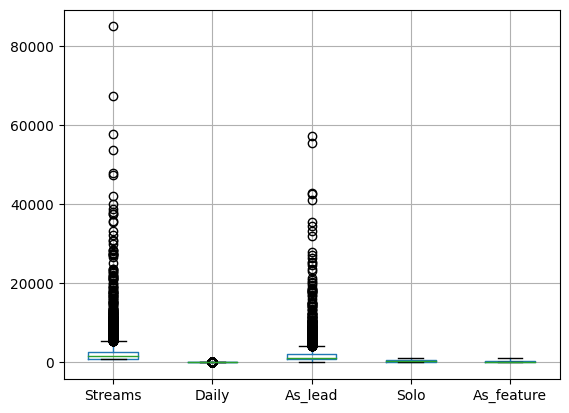

In [ ]:
df.boxplot()

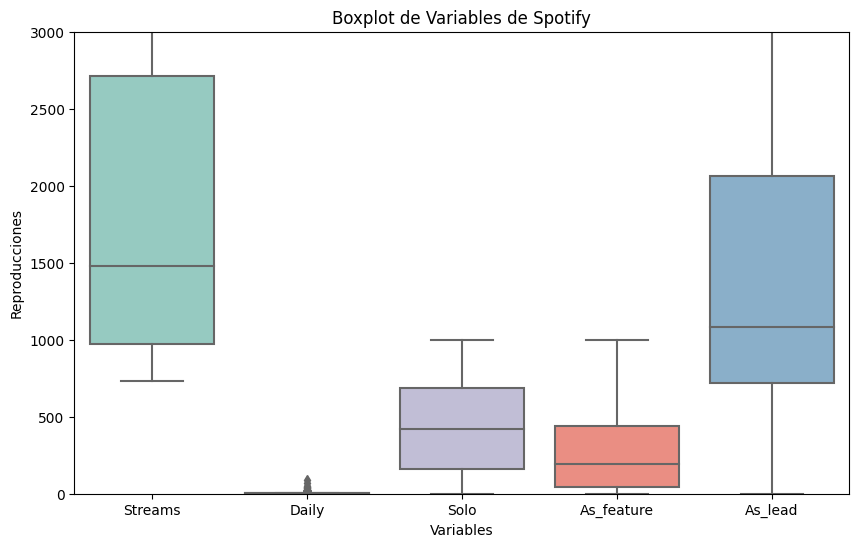

In [ ]:
plt.figure(figsize=(10, 6))  # Ajustar el tamaño de la figura

# Elegir las columnas que deseas visualizar en el boxplot
columns_to_plot = ['Streams', 'Daily', 'Solo', 'As_feature', 'As_lead']

# Crear el boxplot usando Seaborn
sns.boxplot(data=df[columns_to_plot], palette="Set3")

# Personalizar el título y etiquetas de los ejes
plt.title("Boxplot de Variables de Spotify")
plt.xlabel("Variables")
plt.ylabel("Reproducciones")

# Ajustar los límites de los ejes Y para enfocarnos en la región de interés
plt.ylim(0, 3000.0)  # Personaliza los límites Y según tus datos

# Mostrar el boxplot
plt.show()

<Axes: >

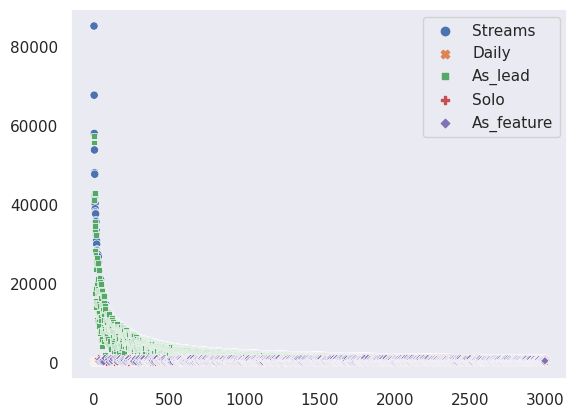

In [ ]:
sns.scatterplot(df)

####Analysis Top 5 'Artist' with most 'Streams'

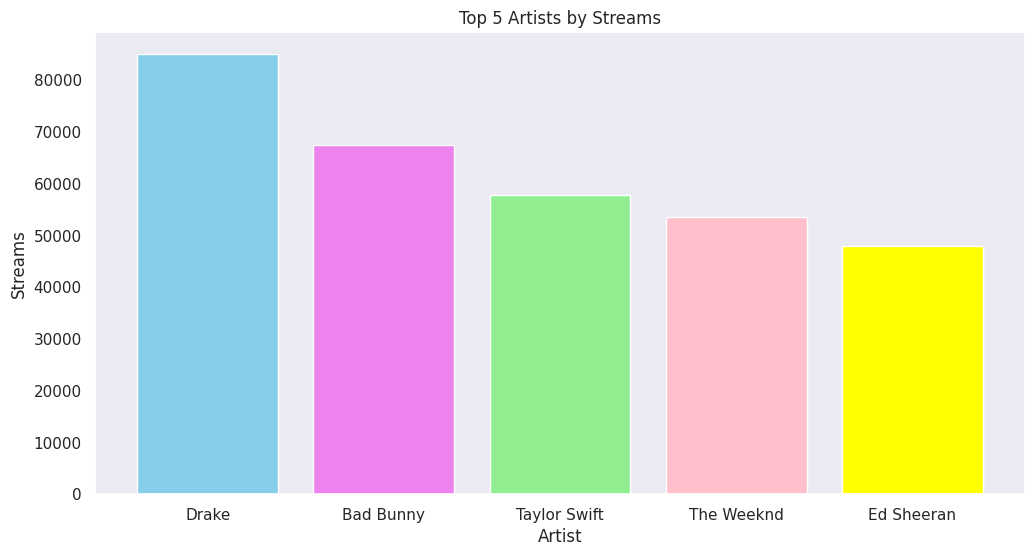

In [ ]:
from IPython.utils.sysinfo import platform
df = df.sort_values(by='Streams', ascending=False)

# Define los colores que deseas usar para las barras.
colores = ['skyblue', 'violet', 'lightgreen', 'pink', 'yellow']  # Puedes personalizar esta lista de colores.

# Crea el gráfico de barras.
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias.
sns.set(style='dark')

# Utiliza la función bar para crear el gráfico de barras.
plt.bar(df['Artist'][:5], df['Streams'][:5], color=colores)

# Personaliza las etiquetas de los ejes y el título del gráfico.
plt.xlabel('Artist')
plt.ylabel('Streams')
plt.title('Top 5 Artists by Streams')

# Muestra el gráfico.
plt.show()

####Analysis Top 5 'Artist' by the most Daily plays.

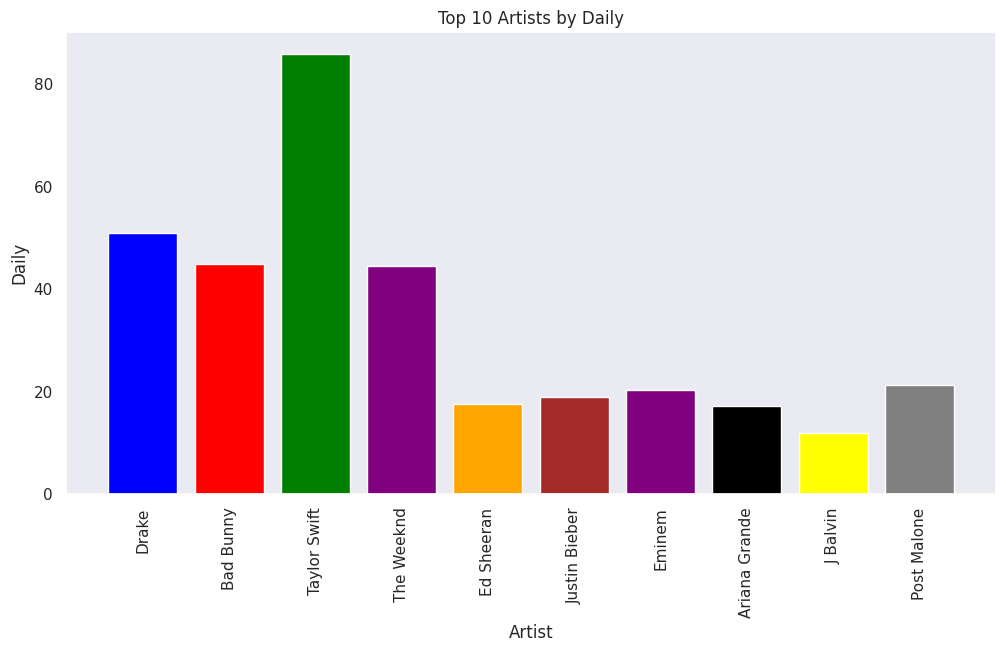

In [ ]:
df = df.sort_values(by='Streams', ascending=False)

# Define los colores que deseas usar para las barras.
colores = ['blue', 'red', 'green', 'purple', 'orange', 'brown', 'purple', 'black', 'yellow', 'grey']  # Puedes personalizar esta lista de colores.

# Crea el gráfico de barras.
plt.figure(figsize=(12, 6))  # Ajusta el tamaño del gráfico según tus preferencias.
sns.set(style='dark')

# Utiliza la función bar para crear el gráfico de barras.
plt.bar(df['Artist'][:10], df['Daily'][:10], color=colores)

# Personaliza las etiquetas de los ejes y el título del gráfico.
plt.xlabel('Artist')
plt.ylabel('Daily')
plt.xticks(rotation=90)
plt.title('Top 10 Artists by Daily')

# Muestra el gráfico.
plt.show()

####Comparation  between 'Features' and 'Solo' by streams

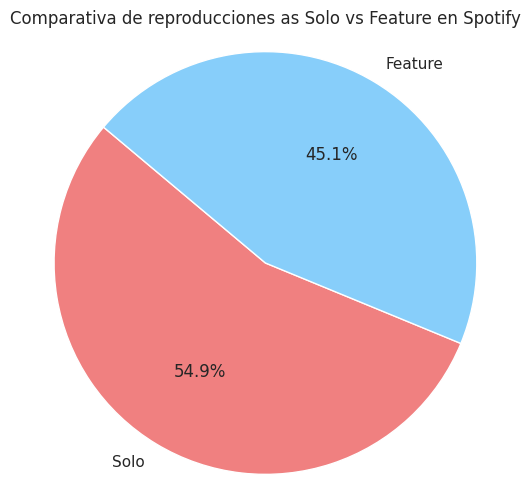

In [ ]:
solo_count = df['Solo'].sum()
feature_count = df['As_feature'].sum()

# Crear una lista con los valores de las cantidades
data = [solo_count, feature_count]

# Etiquetas para cada porción del pastel
labels = ['Solo', 'Feature']

# Colores para cada porción
colors = ['lightcoral', 'lightskyblue']

# Crear el gráfico tipo 'Pie'
plt.figure(figsize=(6, 6))
plt.pie(data, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Comparativa de reproducciones as Solo vs Feature en Spotify')
plt.axis('equal')  # Para que el gráfico sea un círculo perfecto

# Mostrar el gráfico
plt.show()

In [ ]:
top10_lowest_stream=df.sort_values('Streams', ascending=True).head(10).set_index('Artist')
print(top10_lowest_stream)

                       Streams  Daily  As_lead   Solo  As_feature
Artist                                                           
Ayra Starr               728.6  1.881    418.4  380.8       310.1
Vedo                     729.4  0.284    718.2  607.6        11.1
Yasin                    729.6  0.573    645.9  542.0        83.6
Majestic                 729.9  0.489    625.0   37.9       104.9
Vicente Garcia           729.9  0.397    542.2  434.8       187.6
Grover Washington Jr.    729.9  0.466    727.5  208.1         2.4
Joseph Vincent           730.1  0.261    719.6  658.4        10.6
The Band CAMINO          730.2  0.489    692.2  646.4        38.0
Madvillain               730.5  0.644    728.8    4.8         1.6
Loren Allred             730.6  0.232    681.7  681.7        49.0


####The lowest Artist by Streams

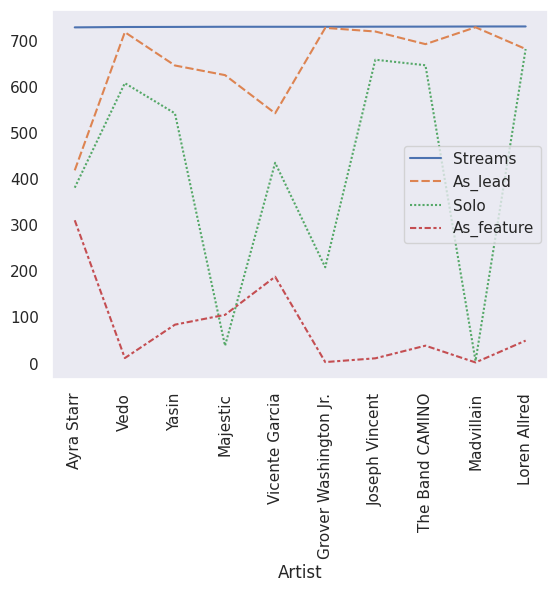

In [ ]:
ax=sns.lineplot(top10_lowest_stream[['Streams','As_lead','Solo','As_feature']])
ax.tick_params(axis='x', rotation=90)

####Heatmap

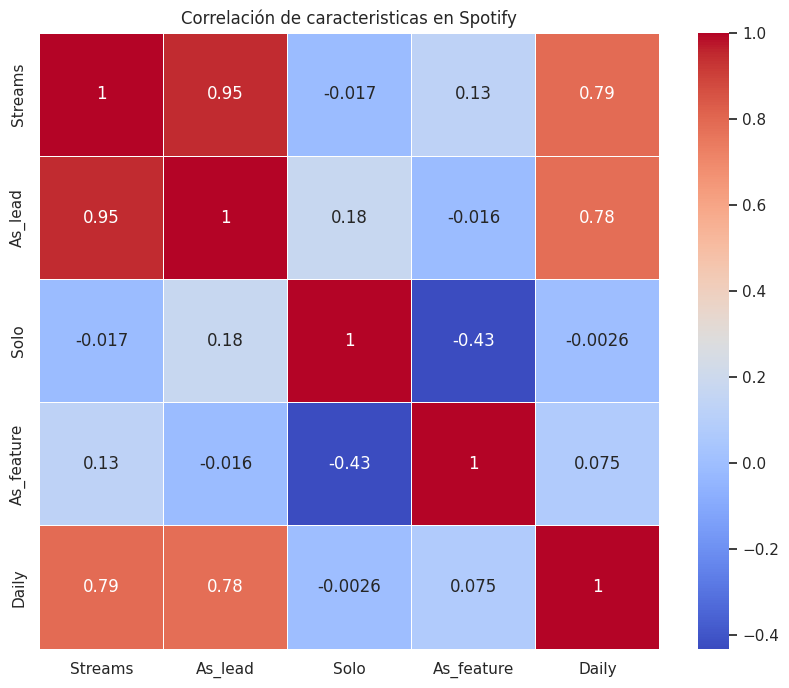

In [ ]:
features = ['Streams', 'As_lead', 'Solo', 'As_feature', 'Daily']

# Calcula la matriz de correlación
correlation_matrix = df[features].corr()
# Configura el tamaño del heatmap
plt.figure(figsize=(10, 8))

# Crea el heatmap de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)

# Personaliza el título del heatmap
plt.title('Correlación de caracteristicas en Spotify')

# Muestra el heatmap
plt.show()
